In [1]:
import pandas as pd
import datetime 
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import scipy
from plotnine import *
%run plotting.ipynb
pd.options.display.max_rows = 100

In [2]:
## Import dataset into dataframe.
## It's very clean already.
%matplotlib inline
df = pd.read_csv('Airline_Delay_Cause.csv')

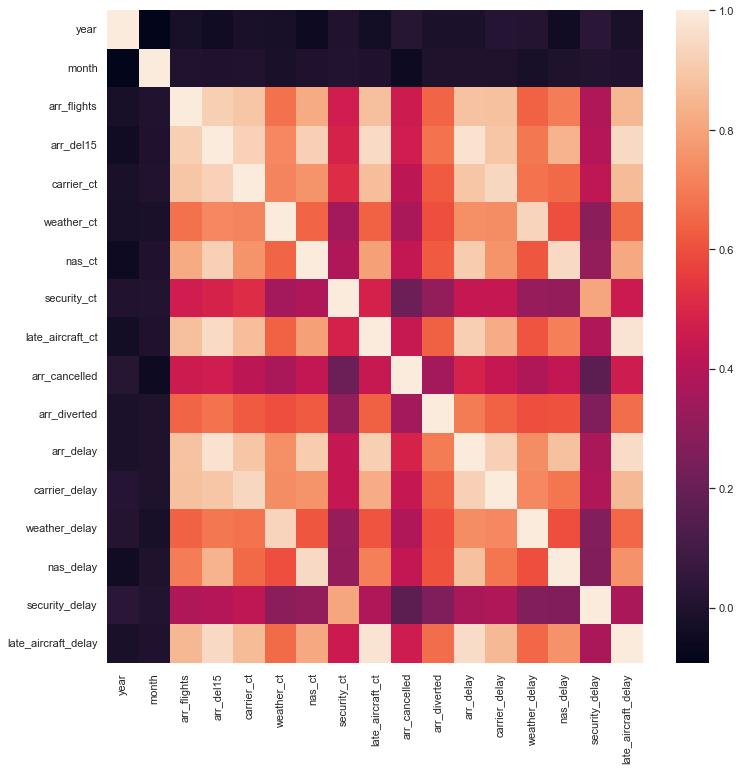

In [3]:
sns.set(rc={'figure.figsize':(12,12)})
plt.tight_layout()
p = sns.heatmap(df.corr()).get_figure()
p.savefig('corrmap.png', dpi=1000)

In [4]:
df.columns
## preprocessing
## enumeration of time (easy to work with)
df['time'] = (df['year']-2007)*12+df['month']
## date as a string object.
df['date'] = df.year.astype(str)+'/'+df.month.astype(str)
## date as a datetime object
df['datetime']= pd.to_datetime(df['date'])
## Adjust delay to only count delays from previous leg.
df['adj_delay'] = df['arr_delay']-df['late_aircraft_delay']

dfTgp = df.groupby(['datetime', 'time']).agg({'arr_flights': sum, 'arr_delay': sum, 'adj_delay': sum}).reset_index()
## The following features are averages of delay (in minutes) per flight arrival
dfTgp['MnPrFt'] = dfTgp['arr_delay']/dfTgp['arr_flights']
dfTgp['adjmpf'] = dfTgp['adj_delay']/dfTgp['arr_flights']
dfTgp.head(10)


,datetime,time,arr_flights,arr_delay,adj_delay,MnPrFt,adjmpf
0,2007-09-01,9,600187.0,5294460.0,3501664.0,8.821351,5.834288
1,2007-10-01,10,629992.0,6674331.0,4335508.0,10.594311,6.881846
2,2007-11-01,11,605149.0,5782072.0,3691410.0,9.554791,6.100002
3,2007-12-01,12,616382.0,11261442.0,6992556.0,18.270232,11.344517
4,2008-01-01,13,605765.0,8366662.0,5220874.0,13.811729,8.618646
5,2008-02-01,14,569236.0,9021911.0,5526627.0,15.849157,9.708850
6,2008-03-01,15,616090.0,8849075.0,5504832.0,14.363283,8.935110
7,2008-04-01,16,598126.0,6444535.0,4167222.0,10.774544,6.967131
8,2008-05-01,17,606293.0,6213330.0,3969066.0,10.248065,6.546449
9,2008-06-01,18,608665.0,9872272.0,6291631.0,16.219549,10.336771


In [5]:
#df['date'] = str(df['month'])+str(df['year'])
# pd.to_datetime(df.month.astype(str)+'/'+df.year.astype(str))
# df['date'] = df.month.astype(str)+'/'+df.year.astype(str)
# df['datetime']= pd.to_datetime(df['date'])
# df['date']
#pd.to_datetime(df.month.astype(str)+'/'+df.year.astype(str))

## This restricts the time interval to around early 2020

dfCov = dfTgp[(dfTgp['time']<=180) & (dfTgp['time']>= 150)].reset_index()
dfCov

,index,datetime,time,arr_flights,arr_delay,adj_delay,MnPrFt,adjmpf
0,141,2019-06-01,150,636691.0,11103884.0,6481925.0,17.439989,10.180645
1,142,2019-07-01,151,659029.0,10339188.0,6211437.0,15.688518,9.425135
2,143,2019-08-01,152,658461.0,9573779.0,5777620.0,14.539630,8.774430
3,144,2019-09-01,153,605979.0,5544159.0,3527728.0,9.149094,5.821535
4,145,2019-10-01,154,636014.0,6543736.0,3996251.0,10.288667,6.283275
5,146,2019-11-01,155,602453.0,5334273.0,3255071.0,8.854256,5.403029
6,147,2019-12-01,156,625763.0,8584420.0,5007387.0,13.718325,8.002050
7,148,2020-01-01,157,607346.0,5283250.0,3591334.0,8.698913,5.913160
8,149,2020-02-01,158,574268.0,5819054.0,3759152.0,10.132994,6.545989
9,150,2020-03-01,159,648229.0,3248251.0,2168824.0,5.010962,3.345768


In [6]:
pd.set_option("display.max_rows", 20)
df.value_counts('airport', ascending = True)

airport
YNG       1
TKI       1
FNL       1
ENV       1
EFD       2
       ... 
MSY    2297
RDU    2308
MCI    2314
ATL    2318
DTW    2342
Length: 406, dtype: int64

We inspect the flight records overall and near the beginning of the Covid 19 pandemic. We will focus on time columns, total arrivals, total minutes delayed, airport, and carrier. We define a new unit, delayed minutes per total arrivals to inspect the ratio of those two variables

In [7]:
## We first look at plots for total minutes delayed over the whole data set
overallAD = plotTLinead(dfTgp)

ggsave(plot = overallAD, filename = 'overallAD.png', dpi = 1000)
#ggplot(dfTgp, aes(x='datetime', y='arr_delay'))+geom_point(size =0.25)+geom_line(aes(color='arr_delay'), show_legend=False)+theme(text = element_text(size = 6))+labs(x='Date', y='Minutes delayed')

/Users/daniel/opt/anaconda3/lib/python3.9/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 6.4 x 4.8 in image.
/Users/daniel/opt/anaconda3/lib/python3.9/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: overallAD.png


In [8]:
## Next, we look at plots for total arrivals per month

overallAF = plotTLineaf(dfTgp)
ggsave(plot = overallAF, filename = 'overallAF.png', dpi = 1000)

/Users/daniel/opt/anaconda3/lib/python3.9/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 6.4 x 4.8 in image.
/Users/daniel/opt/anaconda3/lib/python3.9/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: overallAF.png


In [9]:
## Finally, we look at the plot of minutes delayed over flight arrivals
overallMPF = plotTLinempf(dfTgp)
ggsave(plot = overallMPF, filename = 'overallMPF.png', dpi = 1000)

/Users/daniel/opt/anaconda3/lib/python3.9/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 6.4 x 4.8 in image.
/Users/daniel/opt/anaconda3/lib/python3.9/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: overallMPF.png


In [10]:
overalladjAD = plotTLadjad(dfTgp)

ggsave(plot = overalladjAD, filename = 'overalladjAD.png', dpi = 1000)

/Users/daniel/opt/anaconda3/lib/python3.9/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 6.4 x 4.8 in image.
/Users/daniel/opt/anaconda3/lib/python3.9/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: overalladjAD.png


In [11]:
p = plotTLadjmpf(dfTgp)
ggsave(plot = p, filename = 'overalladjMPF.png', dpi = 1000)

/Users/daniel/opt/anaconda3/lib/python3.9/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 6.4 x 4.8 in image.
/Users/daniel/opt/anaconda3/lib/python3.9/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: overalladjMPF.png


There's a fairly clear impact around time = 160 (i.e. April 2020). All 3 experience a drop. The fact that the MnPrFt (delayed minutes/total arrivals) lowered at this time as well implies that the number of delayed minutes fell at a faster rate than the number of arrivals fell (i.e. in ratio to prior value).

We now look at different airports.

In [12]:
## We first look at plots for total minutes delayed over the whole data set
p1 = plotTLinead(dfCov)
ggsave(plot = p1, filename = 'CovidAD.png', dpi = 1000)

/Users/daniel/opt/anaconda3/lib/python3.9/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 6.4 x 4.8 in image.
/Users/daniel/opt/anaconda3/lib/python3.9/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: CovidAD.png


In [13]:
## Next, we look at plots for total arrivals per month

p2 = plotTLineaf(dfCov)
ggsave(plot = p2, filename = 'CovidAF.png', dpi = 1000)

/Users/daniel/opt/anaconda3/lib/python3.9/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 6.4 x 4.8 in image.
/Users/daniel/opt/anaconda3/lib/python3.9/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: CovidAF.png


In [14]:
## Finally, we look at the plot of average minutes delayed over flight arrivals
p3=plotTLinempf(dfCov)
ggsave(plot = p3, filename = 'CovidMPF.png', dpi = 1000)
#ggplot(dfCov, aes(x='datetime', y='MnPrFt'))+geom_point(size = 0.25) +geom_line(aes(color='MnPrFt'), show_legend=False)+theme(text = element_text(size = 5))+labs(x='Date', y='Minutes delayed per flight arrival')

/Users/daniel/opt/anaconda3/lib/python3.9/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 6.4 x 4.8 in image.
/Users/daniel/opt/anaconda3/lib/python3.9/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: CovidMPF.png


In [15]:
p4 = plotTLadjad(dfCov)

ggsave(plot = p4, filename = 'CovidadjAD.png', dpi = 1000)

/Users/daniel/opt/anaconda3/lib/python3.9/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 6.4 x 4.8 in image.
/Users/daniel/opt/anaconda3/lib/python3.9/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: CovidadjAD.png


In [16]:
p5 = plotTLadjmpf(dfCov)
ggsave(plot = p5, filename = 'CovidadjMPF.png', dpi = 1000)

/Users/daniel/opt/anaconda3/lib/python3.9/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 6.4 x 4.8 in image.
/Users/daniel/opt/anaconda3/lib/python3.9/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: CovidadjMPF.png


In [17]:
airports(150, 180, df)

,airport,arr_flights,arr_delay,adj_delay,mpf
0,ABE,11120.0,108929.0,68799.0,6.186960
1,ABI,5533.0,44926.0,31281.0,5.653533
2,ABQ,47077.0,448199.0,261364.0,5.551841
3,ABR,1905.0,16155.0,13972.0,7.334383
4,ABY,2395.0,14931.0,11602.0,4.844259
...,...,...,...,...,...
373,XNA,25075.0,226897.0,137918.0,5.500219
374,XWA,1967.0,35362.0,30255.0,15.381291
375,YAK,1872.0,12098.0,5043.0,2.693910
376,YKM,754.0,3837.0,2137.0,2.834218



These results indicate that the total minutes of delay lowered more (in a sense relative to the prior value) than the total arrivals lowered. 

We now look at how specific airports fared. The results will indicate which airlport experience the most delay (restricted to the airports with the most arrivals). Knowing this can tell a traveler which airports might be good to avoid.

We start with some bar plots, then we show some line plots again.



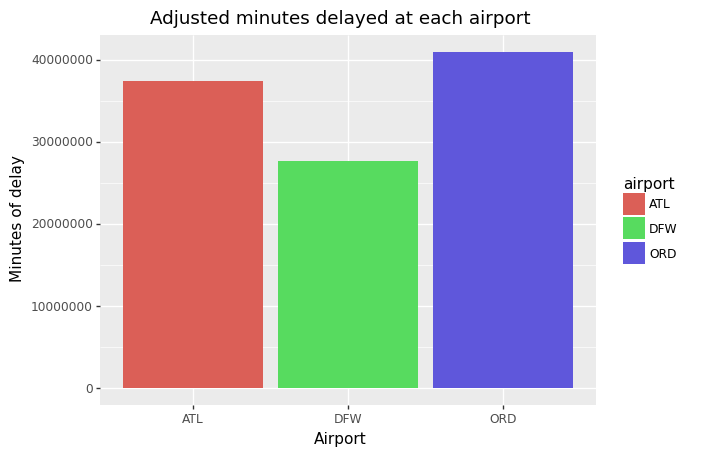

<ggplot: (8761658214328)>

In [18]:
## Airports with most delayed minutes since September 2007
plotairTopNad(9, 188, df,3)
#+labs(x='Airport', y= 'Minutes of delay')+ggtitle('Adjusted minutes of delay at each airport over entire dataset')


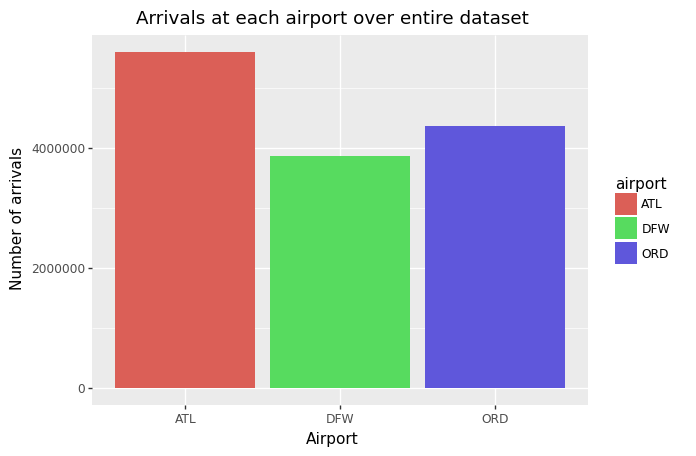

<ggplot: (8761676266099)>

In [19]:
## Airports with most arrivals since September 2007
plotairTopNaf(9, 188, df,3)
#+labs(x='Airport', y= 'Number of arrivals')+ggtitle('Arrivals at each airport over entire dataset')

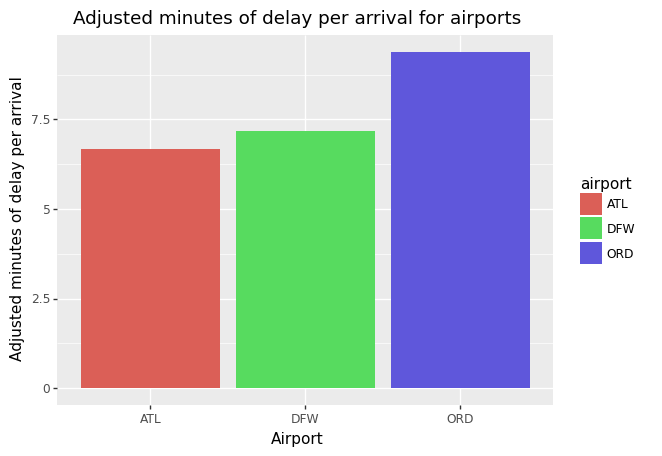

<ggplot: (8761678180437)>

In [20]:
## Airports with highest MnPrFt since September 2007
plotairTopNmpf(9, 188, df,3)

In [21]:
## Airports with most delayed minutes around April 2020
b1 =plotairTopNad(150, 179, df,3)
#+labs(x='Airport', y= 'Minutes of delay')+ggtitle('Adjusted minutes delayed at each airport')

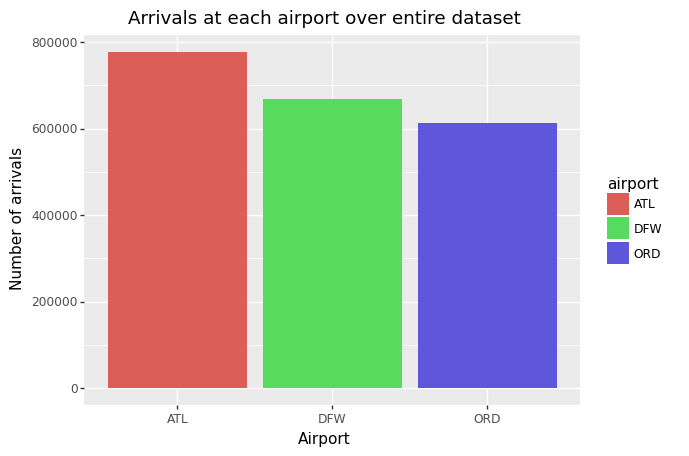

<ggplot: (8761575523530)>

In [22]:
## Airports with most arrivals around April 2020
b2 = plotairTopNaf(150, 179, df,3)
#+labs(x='Airport', y= 'Number of arrivals')+ggtitle('Arrivals at each airport')
b2

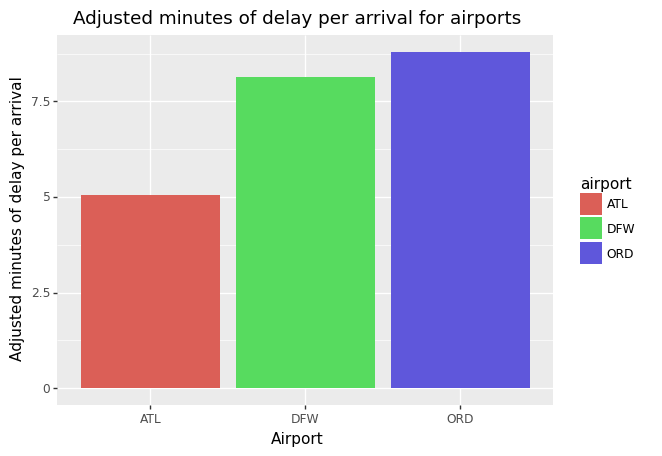

<ggplot: (8761675649675)>

In [23]:
## Airports with highest MnPrFt around April 2020
b3 = plotairTopNmpf(150, 179, df,3)
#+labs(x='Airport', y= 'Adjusted minutes of delay per arrival')+ggtitle('Adjusted minutes of delay per arrival for airports')
b3

We now focus near April 2020 (when time is 160). We look at the corresponding values above over time.

In [24]:
q = plotairOTaf(150,179, df, 3)
#+theme(text = element_text(size = 5))+ggtitle('Arrivals at airports over time')+labs(y='Number of arrivals', x='Date')

In [25]:
ggsave(plot=q, filename='q.png', dpi=1000)

/Users/daniel/opt/anaconda3/lib/python3.9/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 6.4 x 4.8 in image.
/Users/daniel/opt/anaconda3/lib/python3.9/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: q.png


## 

In [26]:
q1 = plotairOTad(150,179, df, 3)
#+theme(text = element_text(size = 5))+ggtitle('Arrivals at airports over time')+labs(y='Adjusted minutes delayed', x='Date')

In [27]:
ggsave(plot=q1, filename='q1.png', dpi=1000)

/Users/daniel/opt/anaconda3/lib/python3.9/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 6.4 x 4.8 in image.
/Users/daniel/opt/anaconda3/lib/python3.9/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: q1.png


In [28]:
q2 = plotairOTmpf(150,179, df, 3)
#+theme(text = element_text(size = 5))+ggtitle('Minutes delayed per arrival at airports over time')+labs(y='Adjusted minutes delayed per arrival', x='Date')

In [29]:
ggsave(plot=q2, filename='q2.png', dpi=1000)

/Users/daniel/opt/anaconda3/lib/python3.9/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 6.4 x 4.8 in image.
/Users/daniel/opt/anaconda3/lib/python3.9/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: q2.png


We can perform the same analyses with respect to carrier instead of airport as well. We focus on the time near April 2020.

In [30]:
b4 = plotcarTopNaf(150,179, df, 3)

In [31]:
b5 = plotcarTopNad(150,179, df, 3)

In [32]:
b6 = plotcarTopNmpf(150,179, df, 3)

In [33]:
q3=plotcarOTaf(150,179, df, 3)

In [34]:
ggsave(plot=q3, filename='q3.png', dpi=1000)

/Users/daniel/opt/anaconda3/lib/python3.9/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 6.4 x 4.8 in image.
/Users/daniel/opt/anaconda3/lib/python3.9/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: q3.png


In [35]:
q4= plotcarOTad(150,179, df, 3)

In [36]:
ggsave(plot=q4, filename='q4.png', dpi=1000)

/Users/daniel/opt/anaconda3/lib/python3.9/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 6.4 x 4.8 in image.
/Users/daniel/opt/anaconda3/lib/python3.9/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: q4.png


In [37]:
q5=plotcarOTmpf(150,179, df, 3)

In [38]:
ggsave(plot=q5, filename='q5.png', dpi=1000)

/Users/daniel/opt/anaconda3/lib/python3.9/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 6.4 x 4.8 in image.
/Users/daniel/opt/anaconda3/lib/python3.9/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: q5.png


All of the major airline carriers and airports experienced a drop in activity near April 2020.

In general, these results indicate that the total minutes delayed fell more (with respect to relative size) than the total arrivals. This holds true for the top carriers and airports.

In [39]:
q6 = ggplot(df, aes(x='arr_flights', y='adj_delay'))+geom_point(size=0.25)+labs(x='Number of arrivals', y='Adjusted minutes of delay')+ggtitle('Numbers of arrivals against adjusted minutes delayed')

In [40]:
ggsave(plot=q6, filename='q6.png', dpi=1000)

/Users/daniel/opt/anaconda3/lib/python3.9/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 6.4 x 4.8 in image.
/Users/daniel/opt/anaconda3/lib/python3.9/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: q6.png
/Users/daniel/opt/anaconda3/lib/python3.9/site-packages/plotnine/layer.py:411: PlotnineWarning: geom_point : Removed 403 rows containing missing values.


In [41]:
q7 = ggplot(dfTgp, aes(x='arr_flights', y='adj_delay'))+geom_point(size=0.25)+labs(x='Number of arrivals', y='Adjusted minutes of delay')+ggtitle('Numbers of arrivals against adjusted minutes delayed')

In [42]:
ggsave(plot=q7, filename='q7.png', dpi=1000)

/Users/daniel/opt/anaconda3/lib/python3.9/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 6.4 x 4.8 in image.
/Users/daniel/opt/anaconda3/lib/python3.9/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: q7.png


In [43]:
ggsave(plot=b1, filename='b1.png', dpi=1000)
ggsave(plot=b2, filename='b2.png', dpi=1000)
ggsave(plot=b3, filename='b3.png', dpi=1000)
ggsave(plot=b4, filename='b4.png', dpi=1000)
ggsave(plot=b5, filename='b5.png', dpi=1000)
ggsave(plot=b6, filename='b6.png', dpi=1000)

/Users/daniel/opt/anaconda3/lib/python3.9/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 6.4 x 4.8 in image.
/Users/daniel/opt/anaconda3/lib/python3.9/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: b1.png
/Users/daniel/opt/anaconda3/lib/python3.9/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 6.4 x 4.8 in image.
/Users/daniel/opt/anaconda3/lib/python3.9/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: b2.png
/Users/daniel/opt/anaconda3/lib/python3.9/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 6.4 x 4.8 in image.
/Users/daniel/opt/anaconda3/lib/python3.9/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: b3.png
/Users/daniel/opt/anaconda3/lib/python3.9/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 6.4 x 4.8 in image.
/Users/daniel/opt/anaconda3/lib/python3.9/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: b4.png
/Users/daniel/opt/anaconda3/lib/python3.9/site-p

In [44]:
df.loc[df['time']==180]

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,time,date,datetime,adj_delay
13603,2021,12,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",127.0,9.0,2.51,0.00,...,264.0,119.0,0.0,68.0,0.0,77.0,180,2021/12,2021-12-01,187.0
13604,2021,12,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",73.0,11.0,5.02,0.00,...,342.0,125.0,0.0,142.0,0.0,75.0,180,2021/12,2021-12-01,267.0
13605,2021,12,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",62.0,8.0,2.63,0.00,...,439.0,156.0,0.0,103.0,0.0,180.0,180,2021/12,2021-12-01,259.0
13606,2021,12,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",166.0,18.0,8.53,3.25,...,1266.0,291.0,693.0,167.0,0.0,115.0,180,2021/12,2021-12-01,1151.0
13607,2021,12,9E,Endeavor Air Inc.,ALB,"Albany, NY: Albany International",52.0,6.0,3.15,1.88,...,497.0,278.0,180.0,21.0,0.0,18.0,180,2021/12,2021-12-01,479.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15297,2021,12,YX,Republic Airline,TPA,"Tampa, FL: Tampa International",93.0,19.0,4.16,3.00,...,731.0,238.0,76.0,234.0,0.0,183.0,180,2021/12,2021-12-01,548.0
15298,2021,12,YX,Republic Airline,TUL,"Tulsa, OK: Tulsa International",9.0,3.0,1.83,0.00,...,123.0,97.0,0.0,26.0,0.0,0.0,180,2021/12,2021-12-01,123.0
15299,2021,12,YX,Republic Airline,TYS,"Knoxville, TN: McGhee Tyson",4.0,2.0,0.82,1.00,...,117.0,14.0,100.0,3.0,0.0,0.0,180,2021/12,2021-12-01,117.0
15300,2021,12,YX,Republic Airline,VPS,"Valparaiso, FL: Eglin AFB Destin Fort Walton B...",14.0,1.0,1.00,0.00,...,51.0,51.0,0.0,0.0,0.0,0.0,180,2021/12,2021-12-01,51.0
